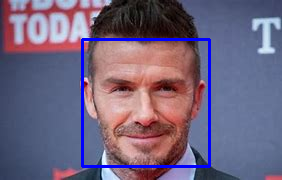

In [1]:
import cv2
from google.colab.patches import cv2_imshow

def detect_faces(img_path):
    # Load the cascade
    cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(cascade_path)

    if face_cascade.empty():
        print("Failed to load cascade classifier!")
        return

    # Read the input image
    img = cv2.imread(img_path)

    if img is None:
        print("Failed to read image!")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the output in Google Colab
    cv2_imshow(img)

# Test
detect_faces('/content/OIP (2).jpeg')


In [2]:
!pip install face_recognition

Please upload images to check:


Saving 6c2a81e96698c34a70707d3654b237b1.jpg to 6c2a81e96698c34a70707d3654b237b1 (4).jpg
Saving 00000018.jpg to 00000018 (1).jpg
Saving 00000103.jpg to 00000103.jpg
Saving 292810ff0d0bd6e03967f4b4fc3990db.jpg to 292810ff0d0bd6e03967f4b4fc3990db (5).jpg
Saving R.jpeg to R (3).jpeg
Checking image: 6c2a81e96698c34a70707d3654b237b1 (4).jpg
This is the known person!


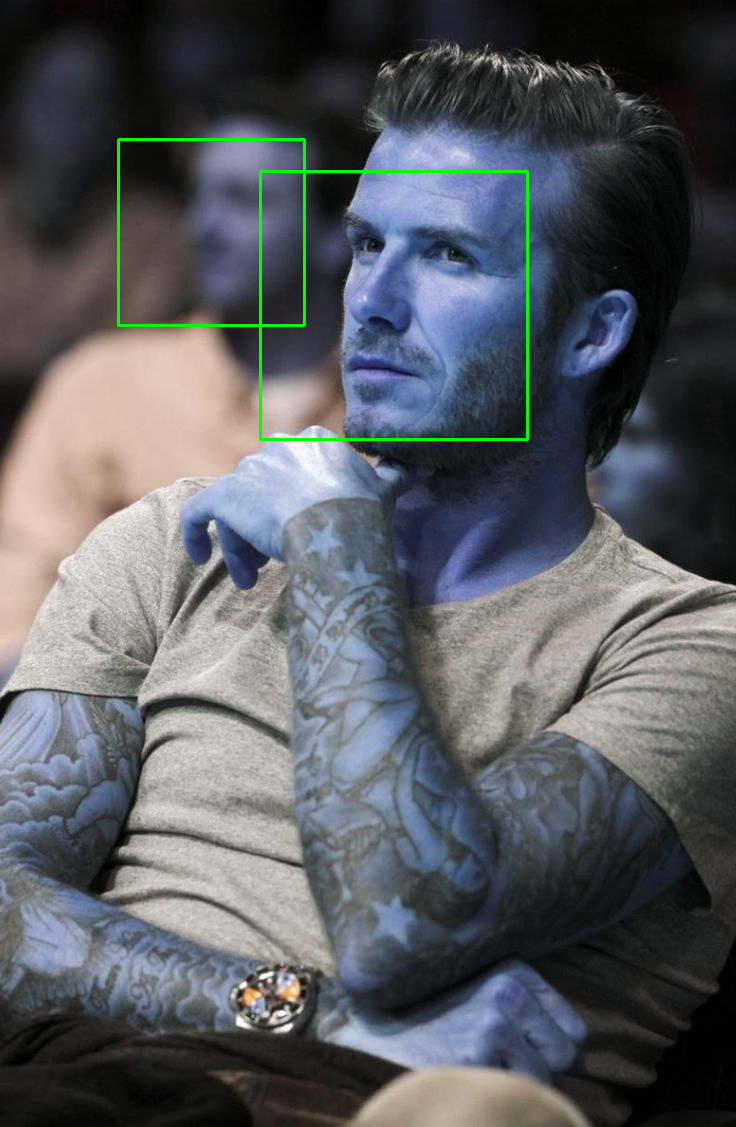


-----------------------------------------

Checking image: 00000018 (1).jpg
This is NOT the known person.

-----------------------------------------

Checking image: 00000103.jpg
This is NOT the known person.

-----------------------------------------

Checking image: 292810ff0d0bd6e03967f4b4fc3990db (5).jpg
This is the known person!


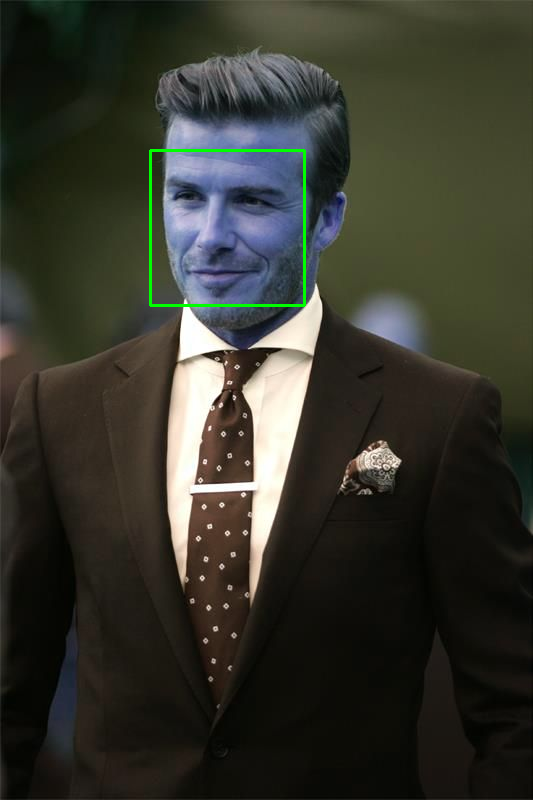


-----------------------------------------

Checking image: R (3).jpeg
This is the known person!


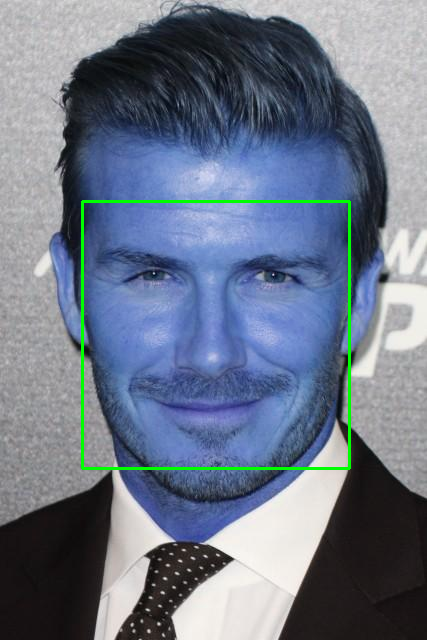


-----------------------------------------



In [3]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Load the image of the person you want to recognize
known_image = face_recognition.load_image_file('/content/OIP (2).jpeg')
known_encoding = face_recognition.face_encodings(known_image)[0]

# Upload multiple images to check
print("Please upload images to check:")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"Checking image: {fn}")
    unknown_image_path = fn

    # Load and encode the uploaded image
    unknown_image = face_recognition.load_image_file(unknown_image_path)
    unknown_encodings = face_recognition.face_encodings(unknown_image)

    # Check if the person in the unknown image matches the known person
    if len(unknown_encodings) > 0:  # Ensure that at least one face is detected
        results = face_recognition.compare_faces([known_encoding], unknown_encodings[0])

        if results[0]:
            print("This is the known person!")
            # Draw a box around the recognized face
            face_locations = face_recognition.face_locations(unknown_image)
            for top, right, bottom, left in face_locations:
                cv2.rectangle(unknown_image, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2_imshow(unknown_image)
        else:
            print("This is NOT the known person.")
    else:
        print("No faces detected in the image.")

    print("\n-----------------------------------------\n")
